In [28]:
import pandas as pd
import numpy as np
# pd.set_option("display.max_rows", None)

## Import the data from a website :

For each question below please have the output showing that the command worked. This will help our TA grade your homeworks faster which I am sure that he will appreciate.

Note : loading the data take a little while, so don't panic ;)

In [29]:
# URL containing the data
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

# Read in the csv file from a website
df_retail = pd.read_csv(url, encoding = 'latin1')

# Show the first 5 entries of the dataframe
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [30]:
#Checking the dimensions of our data
df_retail.shape

(541909, 8)

### 1) Change the column InvoiceNo to OrderNo and make it the indices for the dataframe. Drop the column InvoiceDate

In [31]:
#Change column InvoiceNo to OrderNo
df_retail.rename(columns={'InvoiceNo':'OrderNo'}, inplace=True)

# Drop the column InvoiceDate
df_retail.drop(['InvoiceDate'], axis=1, inplace=True)

# Make OrderNo the indices of the dataframe
df_retail.set_index('OrderNo', inplace=True)


#Show reult of our hardwork
df_retail.head(1)

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
OrderNo,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom


### 2) Find the average amount people spent per country regardless of item, the average number of items sold per country and the total number of each item ordered.

In [76]:
# Average amount spent across all items
df_retail['Amount_Spent'] = df_retail['UnitPrice']*df_retail['Quantity']

# Average amount People Spent per OrderNo By Country
pd.DataFrame(df_retail.groupby('Country')['Amount_Spent'].mean().sort_values())

,Amount_Spent
Country,
Unspecified,10.930615
Saudi Arabia,16.213333
USA,20.002179
Belgium,20.283772
United Kingdom,20.836510
European Community,21.670833
Cyprus,22.134169
Poland,22.226212
Portugal,22.872702


In [33]:
# Average number of items sold per country
pd.DataFrame(df_retail.groupby('Country')['Quantity'].mean().sort_values()).head()

,Quantity
Country,
USA,3.553265
RSA,6.068966
Unspecified,7.399103
Malta,7.433071
Saudi Arabia,7.500000


In [49]:
# Total number of each item sold worldwide
# DO NOTE THAT THERE ARE QUANTITIES WITH NEGATIVE VALUES. THIS IS ASSUMING THAT THOSE ARE RETURNS
df_retail.groupby(['StockCode'])['Quantity'].sum().sort_values().head()


StockCode
22323     1
21895     1
84743C    1
84227     1
90178B    1
Name: Quantity, dtype: int64

In [35]:
# The total number of items sold by a country for fun
df_retail.groupby(['Country'])['Quantity'].sum().sort_values()

Country
Saudi Arabia                 75
Bahrain                     260
RSA                         352
Brazil                      356
Lebanon                     386
European Community          497
Czech Republic              592
Lithuania                   652
Malta                       944
United Arab Emirates        982
USA                        1034
Greece                     1556
Iceland                    2458
Canada                     2763
Unspecified                3300
Poland                     3653
Israel                     4353
Hong Kong                  4769
Austria                    4827
Singapore                  5234
Cyprus                     6317
Italy                      7999
Denmark                    8188
Channel Islands            9479
Finland                   10666
Portugal                  16180
Norway                    19247
Belgium                   23152
Japan                     25218
Spain                     26824
Switzerland               30325


### 3) Remove all rows that contain any missing data, have negative values in Quantity and any rows that have products that cost 10 cents or less, then find all the items that cost 25 cents or less.

In [51]:
# Displaying the original shape
df_retail.shape

(386344, 7)

In [52]:
# Dropping rows with missing data
df_retail.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df_retail.shape

(386344, 7)

In [53]:
# Dropping rows with items costing 10 cents or less.
df_retail.drop(df_retail[df_retail['UnitPrice'] <= .10].index, inplace=True)
df_retail.shape

(386344, 7)

In [54]:
# Dropping all rows with negative quantities in Quantity column
df_retail.drop(df_retail[df_retail['Quantity'] < 0].index, inplace=True)
df_retail.shape

(386344, 7)

In [55]:
# Retrieving all the items that cost 25 cents or less. This includes StockCode that is listed for two different prices below .25
df_retail[df_retail['UnitPrice'] <= .25][['StockCode','UnitPrice']].drop_duplicates(subset=None,keep='first').sort_values('StockCode')


,StockCode,UnitPrice
OrderNo,,
536863,10120,0.21
574470,10135,0.25
537196,15034,0.14
559141,16008,0.12
538073,16008,0.25
...,...,...
538707,M,0.21
537377,M,0.19
539988,M,0.20


In [56]:
# Note that there are certain items that appear twice. Because the StockeCode Sold at two different Unit prices. Below is a list of all the stock codes you can purchase for under 25 cents
unique_StockCode = df_retail[df_retail['UnitPrice'] <= .25][['StockCode','UnitPrice']].drop_duplicates(subset=None,keep='first').copy()
unique_StockCode[~unique_StockCode.duplicated('StockCode')].sort_values('StockCode')

,StockCode,UnitPrice
OrderNo,,
536863,10120,0.21
574470,10135,0.25
537196,15034,0.14
538073,16008,0.25
537225,16010,0.12
...,...,...
581443,90086,0.19
581443,90087,0.19
580865,90089,0.19


In [57]:
# Displaying all of the StockCodes that are sold for different Prices
# Leaving the OrderNo Index so that this can be easily duplicated from the dataframe on a per example basis. Such as looking at OrderNO 16008 & 16008

Duplicate_StockCode_2_Price = df_retail[df_retail['UnitPrice'] <= .25][['StockCode','UnitPrice']].drop_duplicates(subset=None,keep='first').copy()
Duplicate_StockCode_2_Price[Duplicate_StockCode_2_Price.duplicated('StockCode',keep=False)].sort_values(['StockCode','UnitPrice'])

,StockCode,UnitPrice
OrderNo,,
559141,16008,0.12
538073,16008,0.25
544667,16235,0.16
536674,16235,0.21
560841,16236,0.16
...,...,...
571190,M,0.12
537377,M,0.19
539988,M,0.20


### 4) Create two dataframes, one with the data of the United Kingdom and another with the data for France. Then merge the two using the StockCode column and add the suffixes '_UK' to the data from the UK and '_FR' to the data from France

### Please comment on the number of rows that the result has compared to the number of rows the data originally had. Why did the number of rows increase ? What needs to be changed ?
There are a ton more rows on the merged data set because the dtwo data frames have duplicate values for StockCode. The Data was comprised on an OderNo Bases.
To change this we would look at the data from a completely different take. Maybe a list of the Stock codes in either country? I don't know why you would want to merge these two
data sets together like this. It doesn't really make analytical sense.

In [43]:
#Create dataframe with the data from UK
df_UK = df_retail[df_retail['Country'] == 'United Kingdom'].copy()
df_UK.head(10)

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Amount_Spent
OrderNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,15.30
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom,25.50
536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,11.10
536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,11.10


In [44]:

#Create dataframe with the data from France
df_FR = df_retail[df_retail['Country'] == 'France'].copy()
df_FR.head(10)

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Amount_Spent
OrderNo,,,,,,,
536370,22728,ALARM CLOCK BAKELIKE PINK,24,3.75,12583.0,France,90.0
536370,22727,ALARM CLOCK BAKELIKE RED,24,3.75,12583.0,France,90.0
536370,22726,ALARM CLOCK BAKELIKE GREEN,12,3.75,12583.0,France,45.0
536370,21724,PANDA AND BUNNIES STICKER SHEET,12,0.85,12583.0,France,10.2
536370,21883,STARS GIFT TAPE,24,0.65,12583.0,France,15.6
536370,10002,INFLATABLE POLITICAL GLOBE,48,0.85,12583.0,France,40.8
536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,1.25,12583.0,France,30.0
536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2.95,12583.0,France,53.1
536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2.95,12583.0,France,70.8


In [58]:
#Merge both dataframes using StockCode to match the data
UK_FR = pd.merge(df_UK, df_FR, left_on='StockCode', right_on='StockCode', suffixes=('_UK', "_FR"), copy=True)
print("DF_Retail Shape:", df_retail.shape)
print("UK Merged with FR Shape:", UK_FR.shape)

DF_Retail Shape: (386344, 7)
UK Merged with FR Shape: (2347004, 13)


### 5) Create 3 labels : low, medium, shop-a-holic for each country based on the total number of good purchased.

<AxesSubplot:xlabel='Quantity', ylabel='Country'>

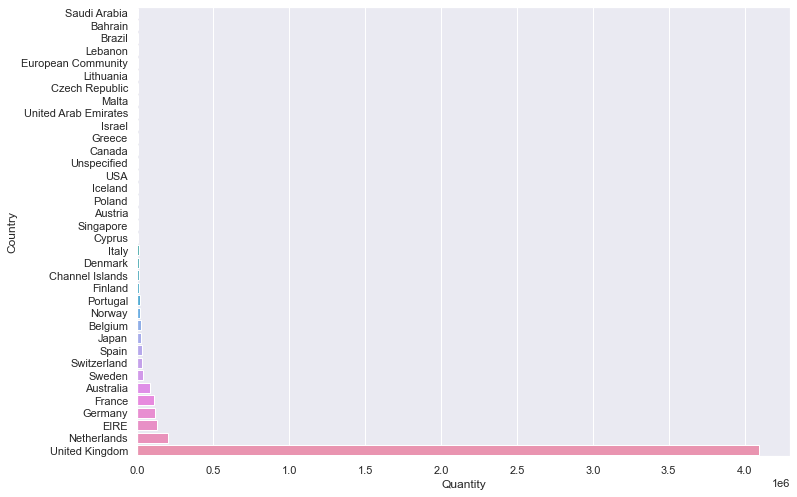

In [60]:
# First to see what we want our bins to look like we need to see what the total purchase are for each country
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
country_Purchases = df_retail.groupby(['Country']).sum()['Quantity'].sort_values().reset_index().copy()
sns.barplot(data=country_Purchases, y='Country', x='Quantity')
# plt.title("Countries and total amount of purchases")
# plt.show()

In [64]:
# It's Visually easy to see how we should assign the bins base on the total number of purchased goods now.
# Though it should be noted that the United Kingdom is an outlier. There are many ways to cut this data down. You Can take the outlier out
# Then cut on quantiles, etc. For this excersie because it is not stated how to cut it, and one of the categoris is shop-a-holic, I am leaving in the outlier
# and am cutting it on 10,000 in quantity. 
country_Purchases['Shopping Bin'] = np.where(country_Purchases['Quantity'] < 10000, "Low", 
                                                                np.where(country_Purchases['Quantity'] < 1000000, "Medium","Shop-a-holic"))
country_Purchases

# Labels

,Country,Quantity,Shopping Bin
0,Saudi Arabia,80,Low
1,Bahrain,260,Low
2,Brazil,356,Low
3,Lebanon,386,Low
4,European Community,499,Low
5,Lithuania,652,Low
6,Czech Republic,671,Low
7,Malta,970,Low
8,United Arab Emirates,982,Low
9,Israel,1018,Low


### 6) Create a pivot table for the data.

### The table should provide the total number of products ordered for each product and every country. In other words, each product should have the associated coutries where that product was ordered and have the total number of that product that was ordered for each country.

In [61]:
df_retail.groupby(['StockCode', 'Country'])['Quantity'].sum().to_frame().head()

Quantity
StockCode Country          
10002     EIRE           12
          France        372
          Germany         1
          Japan           1
          Spain          24

In [75]:
table = pd.pivot_table(df_retail, values=['Quantity'], index=['StockCode', 'Country'], aggfunc=np.sum)
table.head()

Quantity
StockCode Country          
10002     EIRE           12
          France        372
          Germany         1
          Japan           1
          Spain          24

Congratulations ! You made it to the end of the file. Your reward is a joke:

Q: What do you call a boomerang that doesn’t work?












































A: A stick.